   Unnamed: 0          T7           F8          Cz          P4
0        9000  533.956726 -1017.742737  434.163116  345.218933
1        9001  516.659729 -1034.703125  421.286652  339.302429
2        9002  521.615051 -1031.969238  432.577393  335.192261
3        9003  548.441345 -1010.782776  452.522278  344.815033
4        9004  537.386230 -1029.429932  443.662476  348.222076


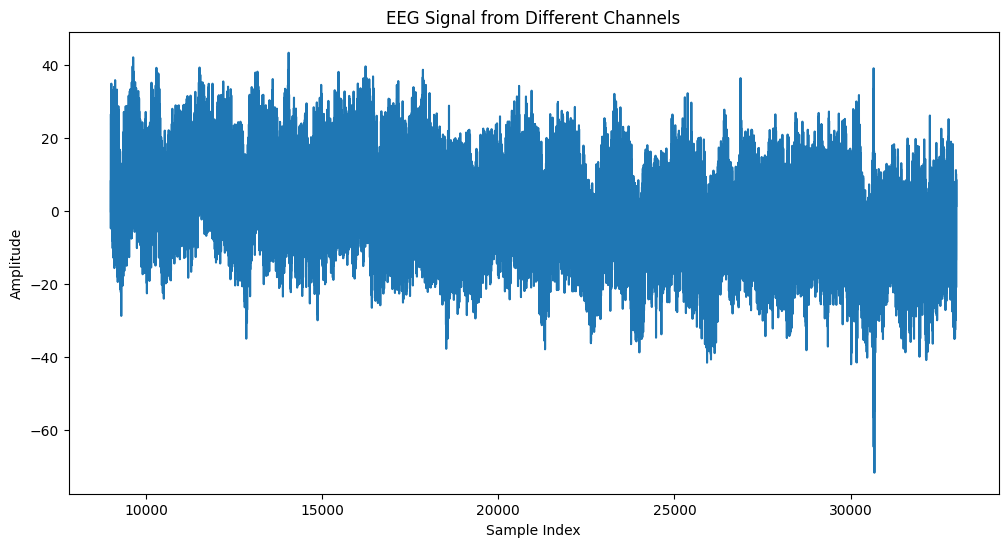

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# 读取txt文件
file_path = 's01_ex01_s01.csv'  # 请将此路径替换为你的txt文件路径
data = pd.read_csv(file_path)

# 显示数据前几行
print(data.head())

# 绘制EXG通道的信号图
plt.figure(figsize=(12, 6))

signal = np.asarray(data[data.columns[3]])
signal = signal - np.median(signal)
plt.plot(data.iloc[:, 0], signal)
#for channel in data.columns[1:]:  # 跳过第一个列（索引列）
 #   plt.plot(data.iloc[:, 0], data[channel], label=channel)

# 根据200 Hz的采样率生成时间戳
sampling_rate = 200  # Hz
time = np.arange(len(signal)) / sampling_rate 
    
plt.title('EEG Signal from Different Channels')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


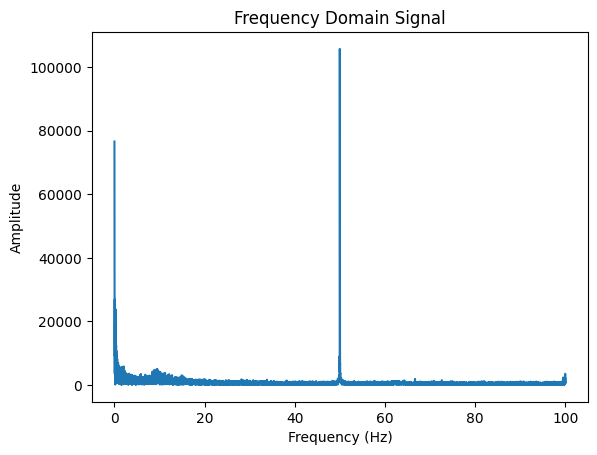

In [2]:
# 应用傅里叶变换
signal_fft = fft(signal)

# 频率
freqs = np.fft.fftfreq(len(signal), d=1/sampling_rate)

# 绘制频域信号，仅显示正频率部分（不包括0）
plt.plot(freqs[freqs > 0], np.abs(signal_fft[freqs > 0]))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


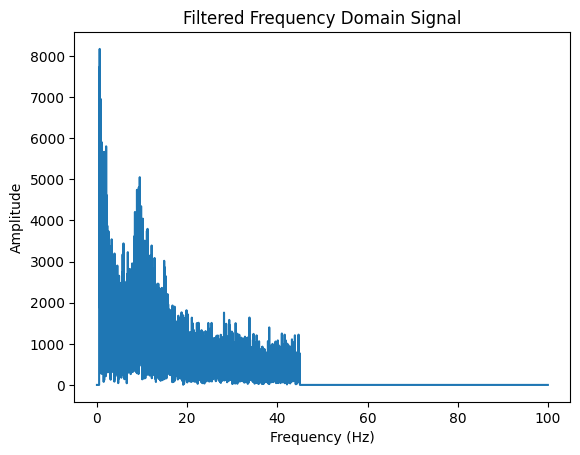

In [3]:
# 设置带通滤波器，仅保留0.5 Hz到45 Hz的频率
# Delta 波 (δ)：0.5-4 Hz ，Theta 波 (θ)：4-8 Hz， Alpha 波 (α)：8-13 Hz， Beta 波 (β)：13-30 Hz， Gamma 波 (γ)：30-45 Hz（有时也定义为更高频率）
signal_fft_filtered = signal_fft.copy()
signal_fft_filtered[(np.abs(freqs) < 0.5) | (np.abs(freqs) > 45)] = 0

# 绘制滤波后的频域信号，仅显示正频率部分（不包括0）
plt.plot(freqs[freqs > 0], np.abs(signal_fft_filtered[freqs > 0]))
plt.title('Filtered Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()



F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


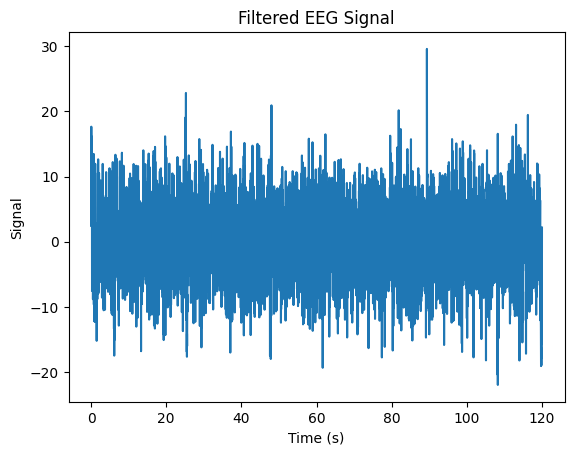

In [4]:
# 应用逆傅里叶变换
filtered_signal = ifft(signal_fft_filtered)

# 绘制去噪后的信号
plt.plot(time, filtered_signal)
plt.title('Filtered EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()


F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


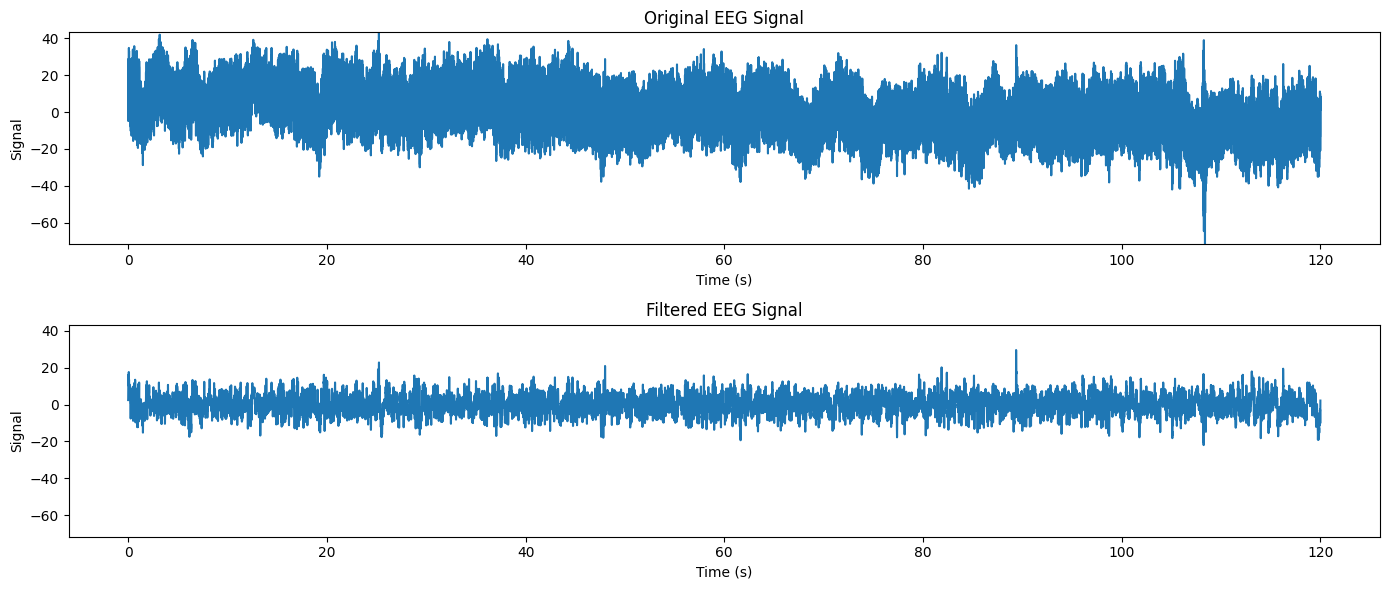

In [5]:
plt.figure(figsize=(14, 6))

y_min = min(np.min(signal), np.min(filtered_signal))
y_max = max(np.max(signal), np.max(filtered_signal))

plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.ylim(y_min, y_max)  # 设置y轴范围

plt.subplot(2, 1, 2)
plt.plot(time, filtered_signal)
plt.title('Filtered EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.ylim(y_min, y_max)  # 设置y轴范围

plt.tight_layout()
plt.show()

F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


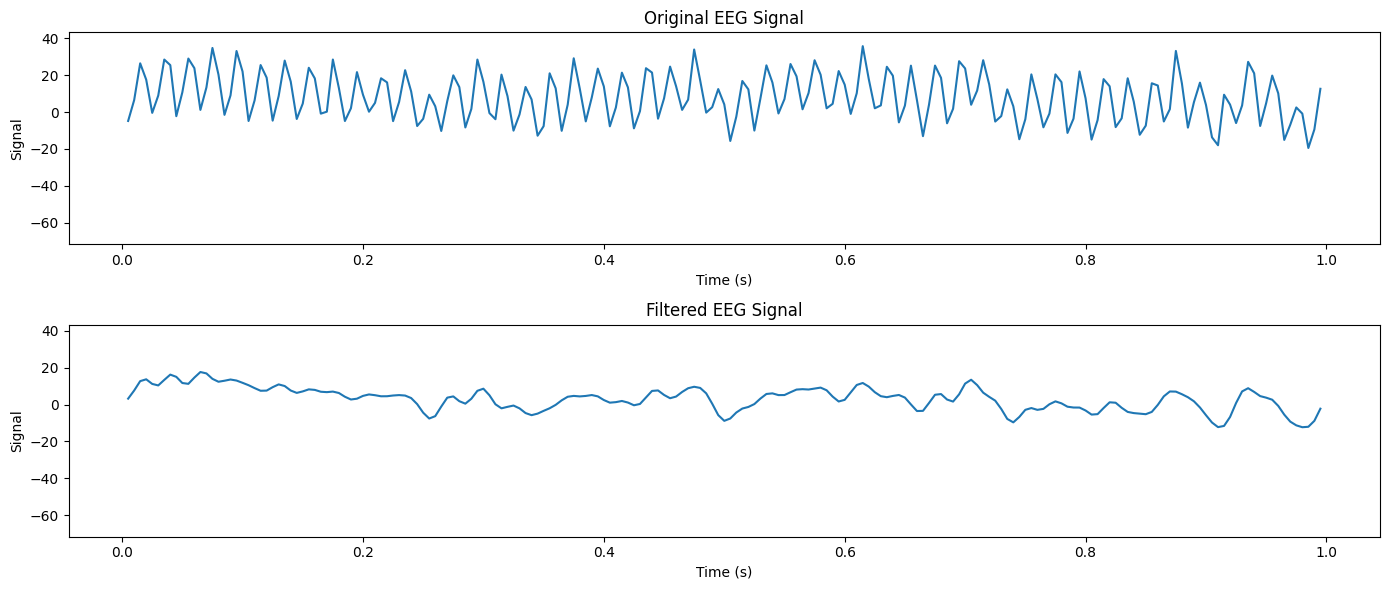

In [7]:
plt.figure(figsize=(14, 6))

display_segment = range(1,200)
    
y_min = min(np.min(signal), np.min(filtered_signal))
y_max = max(np.max(signal), np.max(filtered_signal))

plt.subplot(2, 1, 1)
plt.plot(time[display_segment], signal[display_segment])
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.ylim(y_min, y_max)  # 设置y轴范围

plt.subplot(2, 1, 2)
plt.plot(time[display_segment], filtered_signal[display_segment])
plt.title('Filtered EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.ylim(y_min, y_max)  # 设置y轴范围

plt.tight_layout()
plt.show()